### Conducting k-fold cross validation and comparing the metrics value with train_test_split and k-fold cross validation process

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df=pd.read_csv(r"D:\Materials\Academic\Semester 8\AI and ML\Coding\Datasets\heart_disease_labeled_data.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,typical angina,145,233,<120,left ventricular hypertrophy,150,no,2.3,downsloping,0,fixed defect,no disease
1,67,male,asymptomatic,160,286,>120,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,disease
2,67,male,asymptomatic,120,229,>120,left ventricular hypertrophy,129,yes,2.6,flat,2,reversible defect,disease
3,37,male,non-anginal pain,130,250,>120,normal,187,no,3.5,downsloping,0,normal,no disease
4,41,female,atypical angina,130,204,>120,left ventricular hypertrophy,172,no,1.4,upsloping,0,normal,no disease


In [6]:
# Converting text data into hot encoding 
categorical_features= ["sex", "cp", "fbs","restecg", "exang", "slope", "thal"]
df_encoded= pd.get_dummies(df,columns= categorical_features, drop_first= True)
df_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_>120,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversible defect
0,63,145,233,150,2.3,0,no disease,True,False,False,True,False,True,False,False,False,False,False,False
1,67,160,286,108,1.5,3,disease,True,False,False,False,True,True,False,True,True,False,True,False
2,67,120,229,129,2.6,2,disease,True,False,False,False,True,True,False,True,True,False,False,True
3,37,130,250,187,3.5,0,no disease,True,False,True,False,True,False,True,False,False,False,True,False
4,41,130,204,172,1.4,0,no disease,False,True,False,False,True,True,False,False,False,True,True,False


In [7]:
label_encoder= LabelEncoder()
df_encoded["target"]= label_encoder.fit_transform(df_encoded["target"])

In [8]:
df_encoded["target"].head()

0    1
1    0
2    0
3    1
4    1
Name: target, dtype: int32

In [9]:
# Separating the input and output features 

x=df_encoded.drop("target", axis=1)
y=df_encoded["target"]

#split the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [10]:
# Training the model

model=DecisionTreeClassifier()
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
# Storing the prediction data
y_pred_test= model.predict(x_test)
y_pred_train= model.predict(x_train)

In [12]:
# Demonstrating the result 
print("Train Accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_test))
print("Classfication Report:\n",classification_report(y_test,y_pred_test))
      

Train Accuracy:  1.0
Test Accuracy:  0.75
Classfication Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72        24
           1       0.84      0.72      0.78        36

    accuracy                           0.75        60
   macro avg       0.75      0.76      0.75        60
weighted avg       0.77      0.75      0.75        60



## k-fold cross validation 

In [14]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
#traing the model on each fold and calculating the accuracy score
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

print(f"Accuracy for each fold: {scores}")

Accuracy for each fold: [0.75       0.75       0.71186441 0.72881356 0.69491525]


In [16]:
average_accuracy = np.mean(scores) 
print(f"Average Accuracy: {average_accuracy:.2f}")

Average Accuracy: 0.73


In [17]:
# Get cross-validated predictions
y_pred = cross_val_predict(model, x, y, cv=kf)

# Print Global classification report
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       137
           1       0.78      0.72      0.75       160

    accuracy                           0.74       297
   macro avg       0.74      0.74      0.74       297
weighted avg       0.74      0.74      0.74       297



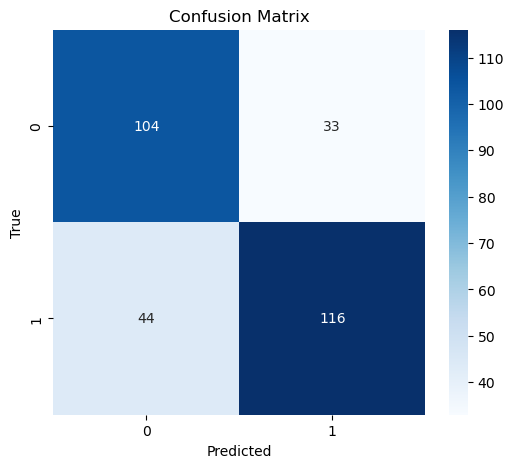

In [18]:
 # Confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# print regression metrics
print("\nGlobal Evaluation Metrics:")
print("MSE :" , mean_squared_error(y, y_pred) )
mse= mean_squared_error(y, y_pred)
print("RMSE:", np.sqrt(mse))
print("MAE:", mean_absolute_error(y, y_pred))
print("R²:", r2_score(y, y_pred))



Global Evaluation Metrics:
MSE : 0.25925925925925924
RMSE: 0.5091750772173156
MAE: 0.25925925925925924
R²: -0.043293795620438


In [36]:
 # Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_HT)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


NameError: name 'y_test_pred_HT' is not defined